In [1]:
import torch
from dataloaders.shapenet_partseg import ShapeNetPartSegDataset
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
ds = ShapeNetPartSegDataset('train', 'data')

--2023-06-24 20:34:16--  https://shapenet.cs.stanford.edu/media/shapenet_part_seg_hdf5_data.zip
Resolving shapenet.cs.stanford.edu (shapenet.cs.stanford.edu)... 171.67.77.19
Connecting to shapenet.cs.stanford.edu (shapenet.cs.stanford.edu)|171.67.77.19|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 362729309 (346M) [application/zip]
Saving to: ‘shapenet_part_seg_hdf5_data.zip’

     0K .......... .......... .......... .......... ..........  0%  116K 50m50s
    50K .......... .......... .......... .......... ..........  0%  126K 48m48s
   100K .......... .......... .......... .......... ..........  0%  378K 37m44s
   150K .......... .......... .......... .......... ..........  0%  189K 36m6s
   200K .......... .......... .......... .......... ..........  0%  378K 32m0s
   250K .......... .......... .......... .......... ..........  0%  378K 29m16s
   300K .......... .......... .......... .......... ..........  0%  189K 29m32s


Archive:  shapenet_part_seg_hdf5_data.zip
   creating: hdf5_data/
  inflating: hdf5_data/ply_data_train5.h5  
  inflating: hdf5_data/catid_partid_to_overallid.json  
  inflating: hdf5_data/part_color_mapping.json  
  inflating: hdf5_data/ply_data_train1.h5  
  inflating: hdf5_data/ply_data_train3.h5  
  inflating: hdf5_data/overallid_to_catid_partid.json  
  inflating: hdf5_data/ply_data_val0.h5  
  inflating: hdf5_data/ply_data_train0.h5  
  inflating: hdf5_data/ply_data_test1.h5  
  inflating: hdf5_data/all_object_categories.txt  
  inflating: hdf5_data/color_partid_catid_map.txt  
  inflating: hdf5_data/ply_data_test0.h5  
  inflating: hdf5_data/test_hdf5_file_list.txt  
 extracting: hdf5_data/val_hdf5_file_list.txt  
  inflating: hdf5_data/ply_data_train4.h5  
  inflating: hdf5_data/ply_data_train2.h5  
  inflating: hdf5_data/train_hdf5_file_list.txt  


In [3]:
def vis_pc(pc, label=None):
    """
    pc: numpy [num_points, 3]
    label: Optional(numpy) [num_points]
    """
    
    # normalize pc
    m = pc.mean(0)
    pc = pc - m
    s = np.max(np.sqrt(np.sum(pc**2, -1)))
    pc = pc / s
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection="3d")
    
    if label is not None:
        ax.scatter(pc[:,0], pc[:,2], pc[:,1], c=label)
    else:
        ax.scatter(pc[:,0], pc[:,2], pc[:,1])
    
    # set the range of axes
    ax.set_xlim(-.7,.7)
    ax.set_ylim(-.7,.7)
    ax.set_zlim(-.7,.7)   
    
    # set the view point
    ax.view_init(elev=30, azim=150)
    
    # turn off the axes
    # ax.axis("off")
    

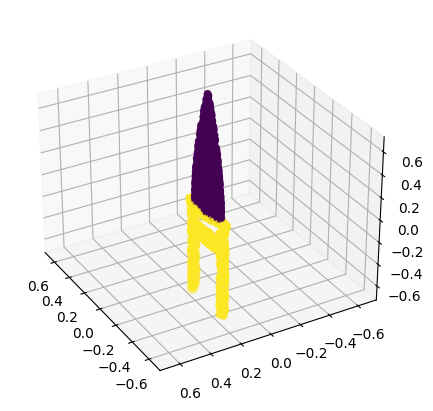

In [4]:
idx = 0
pc, plabel, clabel = ds[idx]
pc = pc.numpy(); plabel = plabel.numpy()
vis_pc(pc, plabel)

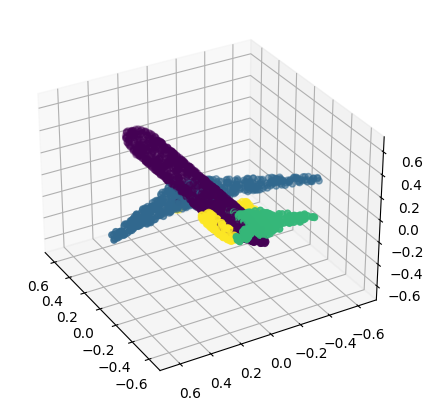

In [5]:
idx = 1
pc, plabel, clabel = ds[idx]
pc = pc.numpy(); plabel = plabel.numpy()
vis_pc(pc, plabel)

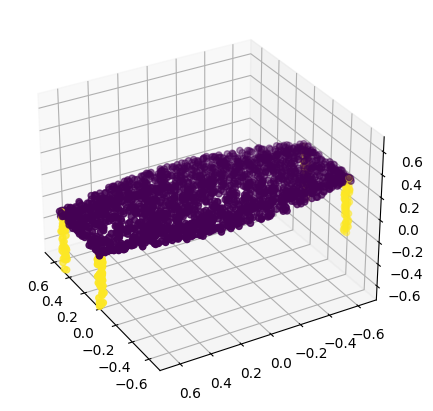

In [6]:
idx = 10
pc, plabel, clabel = ds[idx]
pc = pc.numpy(); plabel = plabel.numpy()
vis_pc(pc, plabel)